TypeError: 'QuadContourSet' object is not iterable

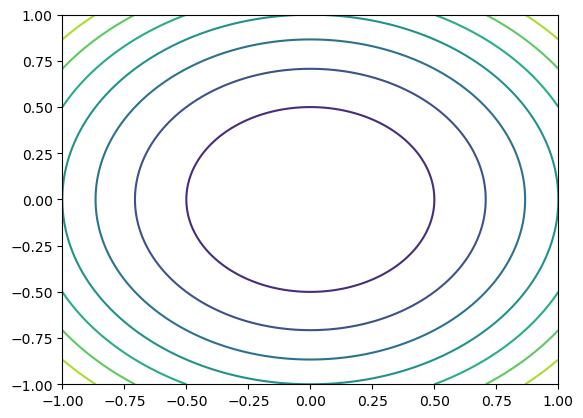

In [8]:
# Source - https://stackoverflow.com/a
# Posted by BR123
# Retrieved 2026-01-13, License - CC BY-SA 3.0

import numpy as np
import matplotlib.pyplot as plt
from bokeh.models import ColumnDataSource
from bokeh.io import output_file
from bokeh.plotting import gridplot,figure, show

def get_contour_data(X, Y, Z):
    cs = plt.contour(X, Y, Z)
    xs = []
    ys = []
    xt = []
    yt = []
    col = []
    text = []
    isolevelid = 0
    for isolevel in cs:
        isocol = isolevel.get_color()[0]
        thecol = 3 * [None]
        theiso = str(cs.get_array()[isolevelid])
        isolevelid += 1
        for i in range(3):
            thecol[i] = int(255 * isocol[i])
        thecol = '#%02x%02x%02x' % (thecol[0], thecol[1], thecol[2])

        for path in isolevel.get_paths():
            v = path.vertices
            x = v[:, 0]
            y = v[:, 1]
            xs.append(x.tolist())
            ys.append(y.tolist())
            xt.append(x[len(x) / 2])
            yt.append(y[len(y) / 2])
            text.append(theiso)
            col.append(thecol)

    source = ColumnDataSource(data={'xs': xs, 'ys': ys, 'line_color': col,'xt':xt,'yt':yt,'text':text})
    return source


#output_file("contour.html")

N = 400
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

source = get_contour_data(X,Y,Z)
plot = figure(plot_width=400,plot_height=400,x_range=[-1,1], y_range=[-1,1])
plot.multi_line(xs='xs', ys='ys', line_color='line_color', source=source)
plot.text(x='xt',y='yt',text='text',source=source,text_baseline='middle',text_align='center')
show(plot)
#save(plot)
